In [134]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, transpile, assemble
from qiskit import Aer, execute
from qiskit.providers.aer import StatevectorSimulator
from qiskit.tools.visualization import plot_histogram
from qiskit.visualization import plot_bloch_multivector
from math import pi
from qiskit.quantum_info import Statevector
from qiskit.circuit.library import QFT

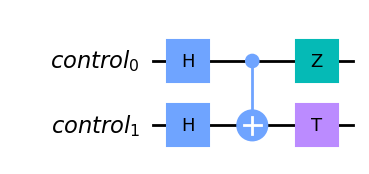

In [135]:
a = QuantumRegister(2, 'control')
qc = QuantumCircuit(a)
qc.h(a)
qc.cx(a[0],a[1])
qc.z(a[0])
qc.t(a[1])
#qc.cp(2*pi/3, a[0], [a[1], a[2]])
uGate = qc.to_gate().control()
qc.draw(output='mpl')

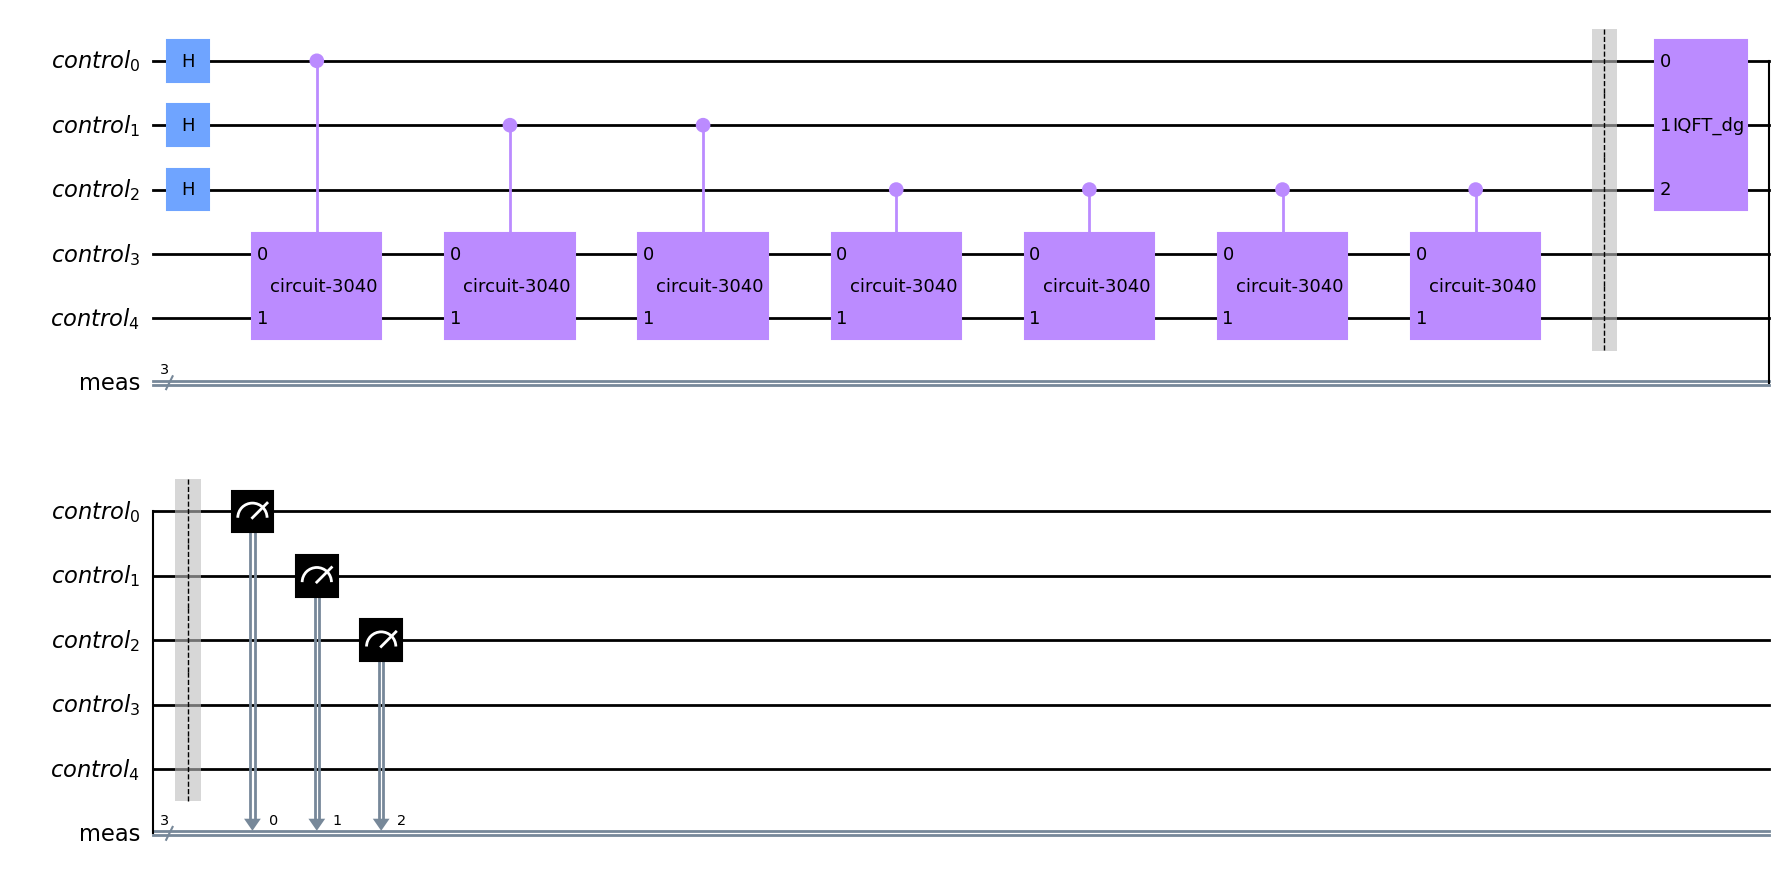

In [136]:
b = QuantumRegister(5, 'control')
c = ClassicalRegister(3, 'meas')
qpe = QuantumCircuit(b, c)
#qpe.x(b[3])
#qpe.x(b[4])
for qubit in range(3):
    qpe.h(qubit)
    
repetitions = 1
for counting_qubit in range(3):
    for i in range(repetitions):
        qpe.append(uGate, [counting_qubit] + [3, 4]); # This is CU
    repetitions *= 2
    
    
    
def qft_dagger(qc, n):
    """n-qubit QFTdagger the first n qubits in circ"""
    # Don't forget the Swaps!
    for qubit in range(n//2):
        qc.swap(qubit, n-qubit-1)
    for j in range(n):
        for m in range(j):
            qc.cp(-pi/float(2**(j-m)), m, j)
        qc.h(j)
        
        
qpe.barrier()
qpe.compose(QFT(3, inverse=True), inplace=True)
# Measure
qpe.barrier()
for n in range(3):
    qpe.measure(n,n)
qpe.draw(output='mpl')

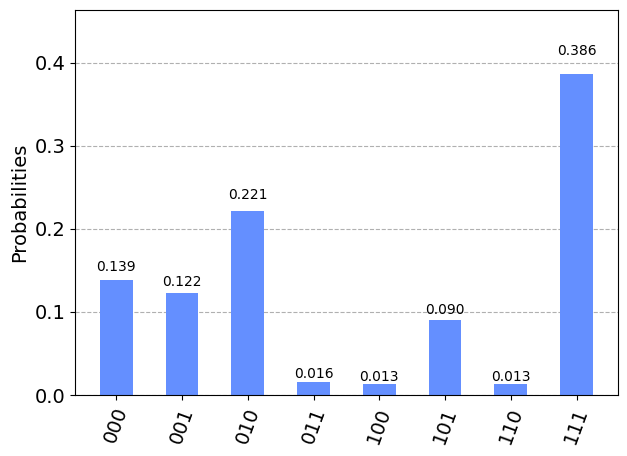

In [137]:
aer_sim = Aer.get_backend('aer_simulator')
shots = 2048
t_qpe = transpile(qpe, aer_sim)
qobj = assemble(t_qpe, shots=shots)
results = aer_sim.run(qobj).result()
answer = results.get_counts()

plot_histogram(answer)

{'00': 0.249999970197678, '01': 0.249999970197678, '10': 0.249999949296019, '11': 0.249999949296019}


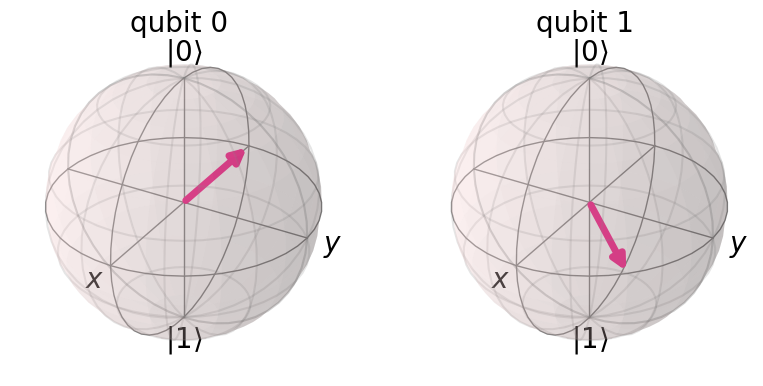

In [88]:
backend = StatevectorSimulator(precision='single')
job = execute(qc, backend, shots=500)  
result = job.result()
print(result.get_counts())
plot_bloch_multivector(result.get_statevector())

In [89]:
result.get_statevector()

Statevector([ 0.49999997+0.j        , -0.49999997+0.j        ,
              0.35355335+0.35355335j, -0.35355335-0.35355335j],
            dims=(2, 2))


In [90]:
st0 = Statevector.from_instruction(qc) 
st0

Statevector([ 0.5       +0.j        , -0.5       +0.j        ,
              0.35355339+0.35355339j, -0.35355339-0.35355339j],
            dims=(2, 2))


In [117]:
backend = Aer.get_backend('unitary_simulator')
job = execute(qc, backend, shots=8192)
result = job.result()

print(result.get_unitary(qc,2))

Operator([[ 0.5 +0.j  ,  0.5 -0.j  ,  0.5 -0.j  ,  0.5 -0.j  ],
          [-0.5 +0.j  ,  0.5 -0.j  ,  0.5 -0.j  , -0.5 +0.j  ],
          [ 0.35+0.35j,  0.35+0.35j, -0.35-0.35j, -0.35-0.35j],
          [-0.35-0.35j,  0.35+0.35j, -0.35-0.35j,  0.35+0.35j]],
         input_dims=(2, 2), output_dims=(2, 2))


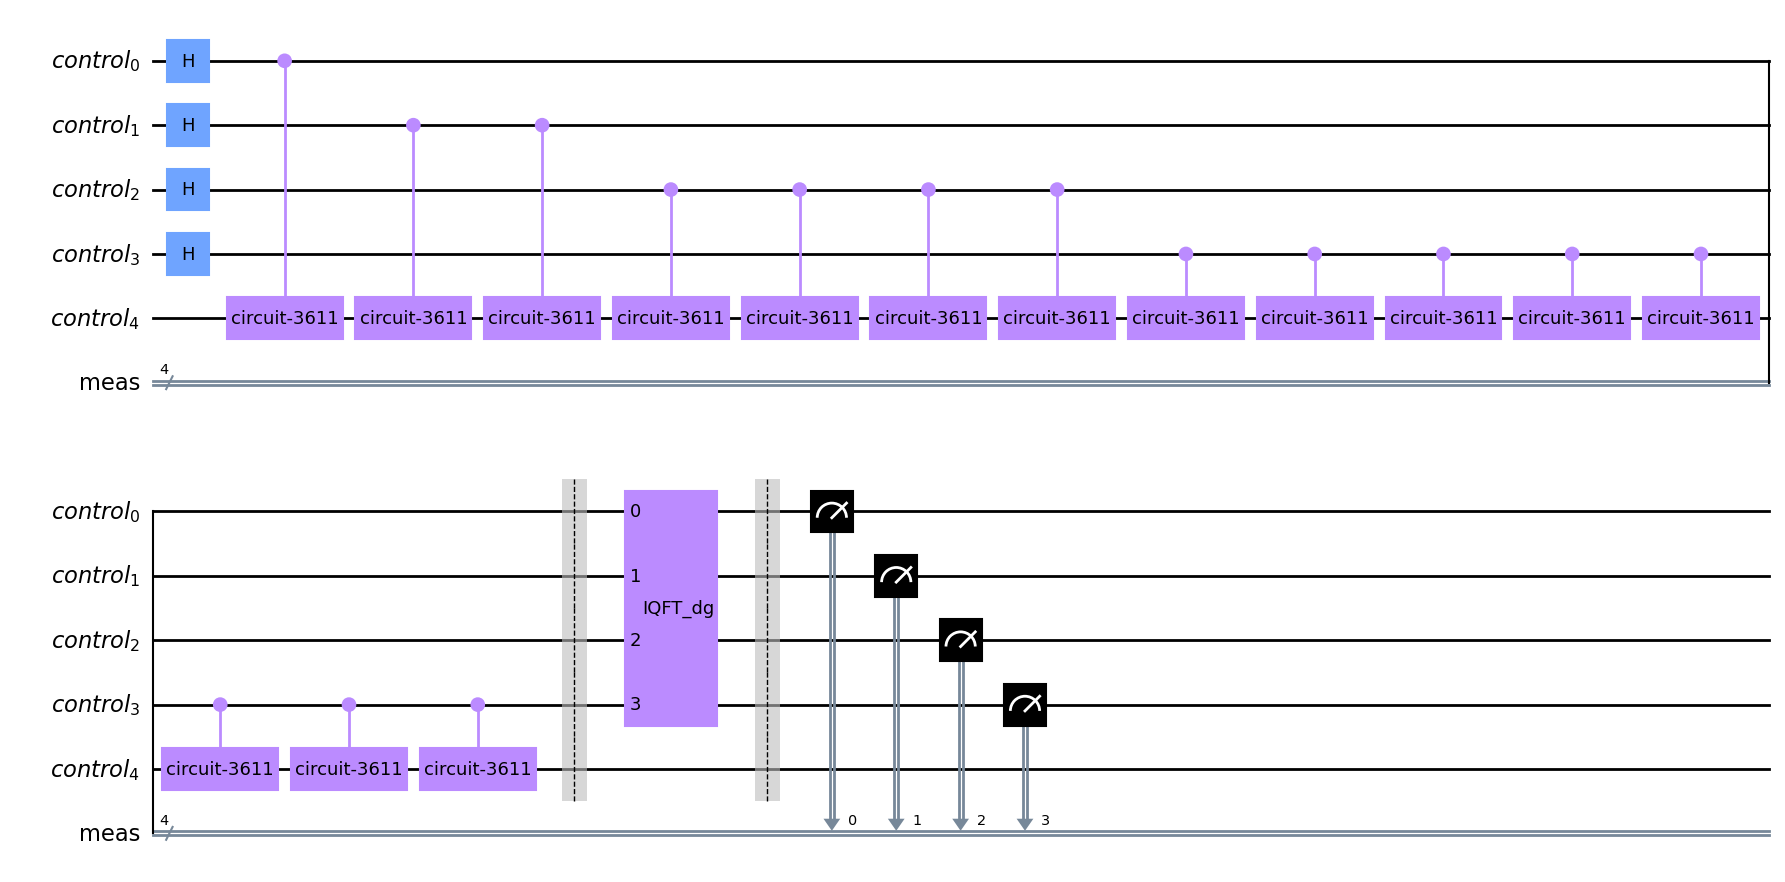

In [140]:

hada = QuantumCircuit(1)
hada.h(0)
hada.z(0)
h = hada.to_gate().control()
b = QuantumRegister(5, 'control')
c = ClassicalRegister(4, 'meas')
qpe = QuantumCircuit(b, c)
#qpe.x(b[4])
for qubit in range(4):
    qpe.h(qubit)

repetitions = 1
for counting_qubit in range(4):
    for i in range(repetitions):
        qpe.append(h, [counting_qubit] + [4]); # This is CU
    repetitions *= 2
    
    
    
def qft_dagger(qc, n):
    """n-qubit QFTdagger the first n qubits in circ"""
    # Don't forget the Swaps!
    for qubit in range(n//2):
        qc.swap(qubit, n-qubit-1)
    for j in range(n):
        for m in range(j):
            qc.cp(-pi/float(2**(j-m)), m, j)
        qc.h(j)
        
        
qpe.barrier()
qpe.compose(QFT(4, inverse=True), inplace=True)
# Measure
qpe.barrier()
for n in range(4):
    qpe.measure(n,n)
qpe.draw(output='mpl')

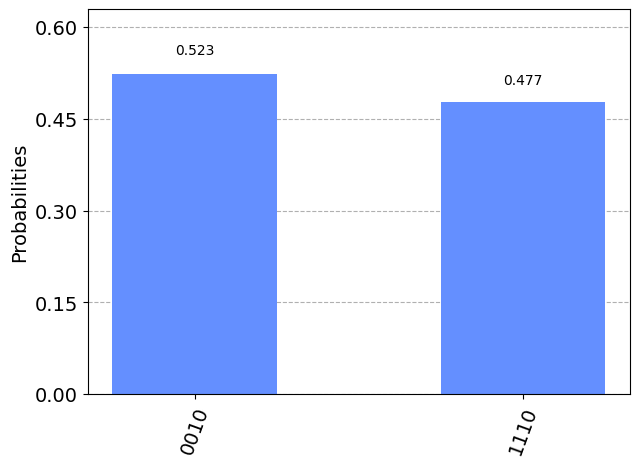

In [141]:
aer_sim = Aer.get_backend('aer_simulator')
shots = 2048
t_qpe = transpile(qpe, aer_sim)
qobj = assemble(t_qpe, shots=shots)
results = aer_sim.run(qobj).result()
answer = results.get_counts()

plot_histogram(answer)